# TSNE Analysis

In [1]:
import sys
sys.path.append('C:/Users/nikol/Documents/GitHub/EnsembleTools')

In [2]:
from dpet.ensemble_analysis import EnsembleAnalysis
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "8"

## Download from Atlas and Load Data

In [3]:
ens_codes = [
    'PED00423e001',
    'PED00424e001'
]
data_dir = 'C:/Users/nikol/Documents/test_dir/ped'

analysis = EnsembleAnalysis(ens_codes, data_dir)
analysis.download_from_database(database='ped')

Ensemble PED00423e001 already downloaded. Skipping.
File PED00423e001.pdb already exists. Skipping extraction.
Ensemble PED00424e001 already downloaded. Skipping.
File PED00424e001.pdb already exists. Skipping extraction.


In [4]:
analysis.generate_trajectories()

Trajectory already exists for ensemble PED00423e001. Loading trajectory.
Trajectory already exists for ensemble PED00424e001. Loading trajectory.


In [5]:
analysis.random_sample_trajectories(sample_size=200)

## Featurization

In [6]:
analysis.extract_features(featurization='phi_psi')

Performing feature extraction for Ensemble: PED00423e001.
Transformed ensemble shape: (200, 182)
Performing feature extraction for Ensemble: PED00424e001.
Transformed ensemble shape: (200, 182)
Feature names: ['SER2-PHI', 'MET3-PHI', 'THR4-PHI', 'PRO5-PHI', 'SER6-PHI', 'THR7-PHI', 'PRO8-PHI', 'PRO9-PHI', 'ARG10-PHI', 'SER11-PHI', 'ARG12-PHI', 'GLY13-PHI', 'THR14-PHI', 'ARG15-PHI', 'TYR16-PHI', 'LEU17-PHI', 'ALA18-PHI', 'GLN19-PHI', 'PRO20-PHI', 'SER21-PHI', 'GLY22-PHI', 'ASN23-PHI', 'THR24-PHI', 'SER25-PHI', 'SER26-PHI', 'SER27-PHI', 'ALA28-PHI', 'LEU29-PHI', 'MET30-PHI', 'GLN31-PHI', 'GLY32-PHI', 'GLN33-PHI', 'LYS34-PHI', 'THR35-PHI', 'PRO36-PHI', 'GLN37-PHI', 'LYS38-PHI', 'PRO39-PHI', 'SER40-PHI', 'GLN41-PHI', 'ASN42-PHI', 'LEU43-PHI', 'VAL44-PHI', 'PRO45-PHI', 'VAL46-PHI', 'THR47-PHI', 'PRO48-PHI', 'SER49-PHI', 'THR50-PHI', 'THR51-PHI', 'LYS52-PHI', 'SER53-PHI', 'PHE54-PHI', 'LYS55-PHI', 'ASN56-PHI', 'ALA57-PHI', 'PRO58-PHI', 'LEU59-PHI', 'LEU60-PHI', 'ALA61-PHI', 'PRO62-PHI', 'PRO6

## Dimensionality Reduction

In [7]:
analysis.reduce_features(method='tsne', perplexity_vals = [10, 50, 100], circular=True, range_n_clusters=range(2,10,1))

tsne is running...


c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_

Best Perplexity: 100
Best Number of Clusters: 2


c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_

## Analysis

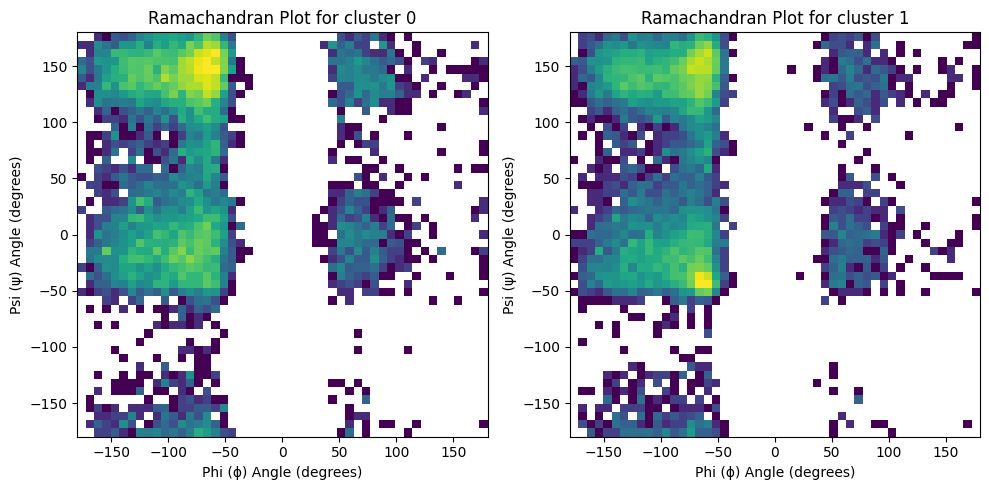

In [8]:
from dpet.visualization import Visualization


visualization = Visualization(analysis)

visualization.tsne_ramachandran_plot_density(save=False)

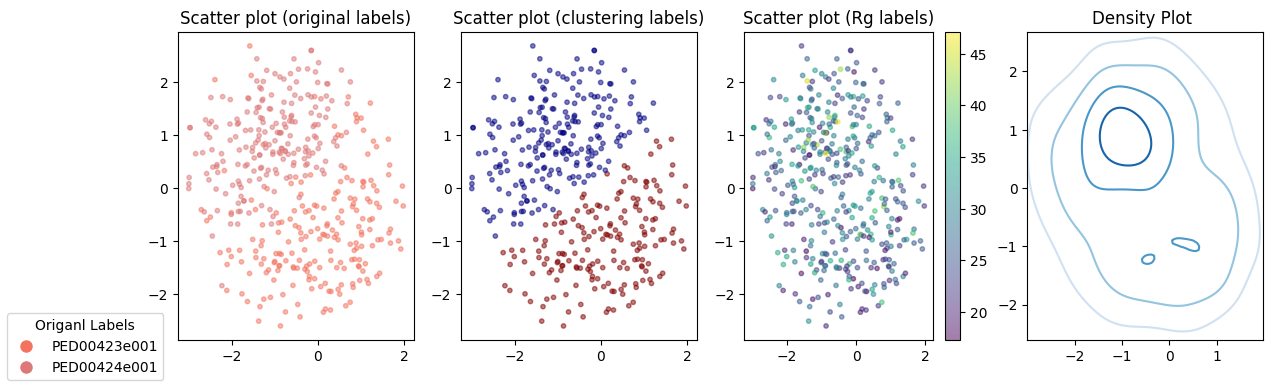

In [9]:
visualization.tsne_scatter_plot(save=False)

Plots saved to C:\Users\nikol\Documents\test_dir\ped\plots\tsne.pdf


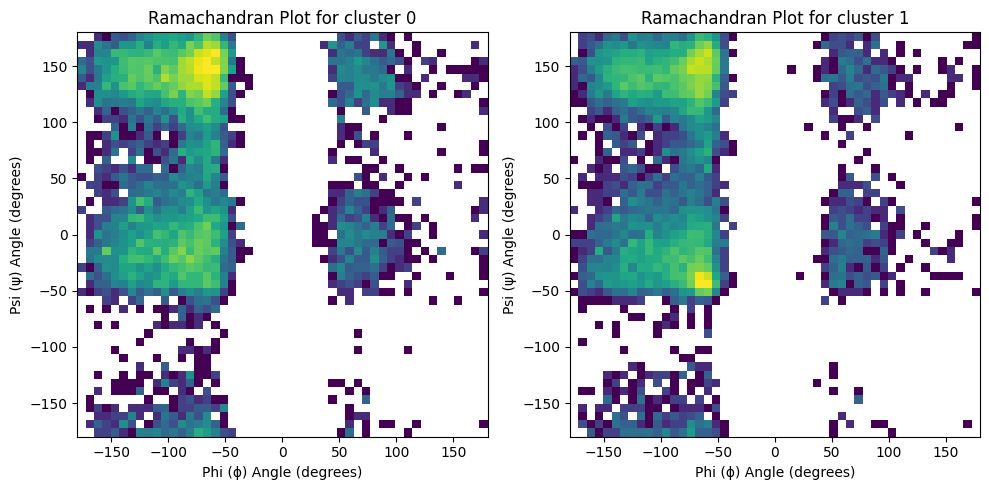

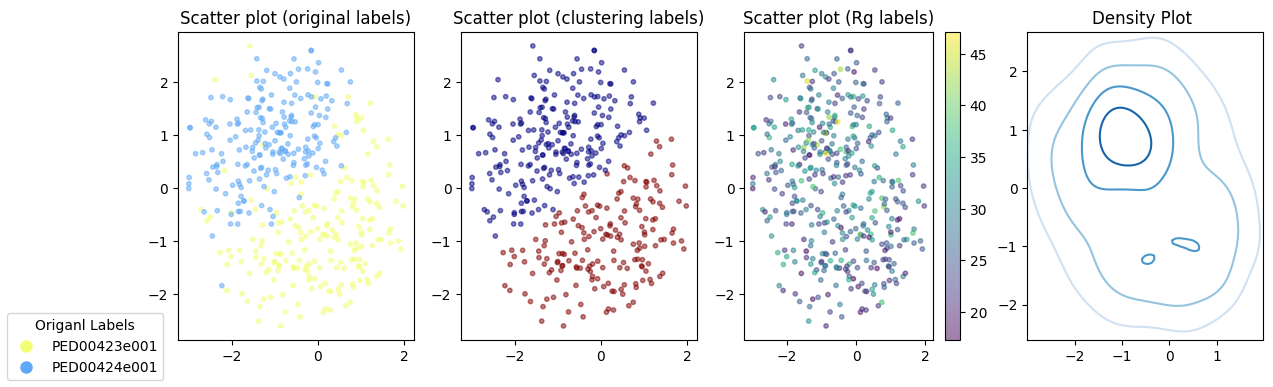

In [10]:
visualization.generate_report()

In [11]:
visualization.generate_custom_report()

Plots saved to C:\Users\nikol\Documents\test_dir\ped\plots\custom_report.pdf
